The following is a task I did for pre-interview phase.

In [1]:
# adding nessacsary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### Some general info on the dataset:

In [69]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,27.542818,98.480663,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.423322,107.505204,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It's good to plot some of the featuristics of the dataset to get deeper insight of the features.

The relationship/correlation of the features:

<AxesSubplot:>

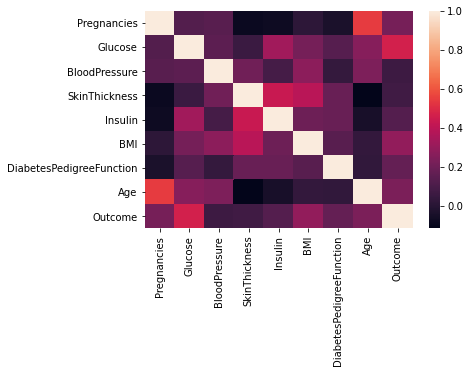

In [3]:
correlation_data = dataset.corr(method='pearson')
sns.heatmap(correlation_data)

From the correlation plot, it can be seen that features such as age/pregnancy, glucose/outcome and some others are correlated. This is nothing unexpected because age affects pregnancy, and vice versa. Also glucose levels have a direct effect on Outcome(being diabetic/healthy).

In [4]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

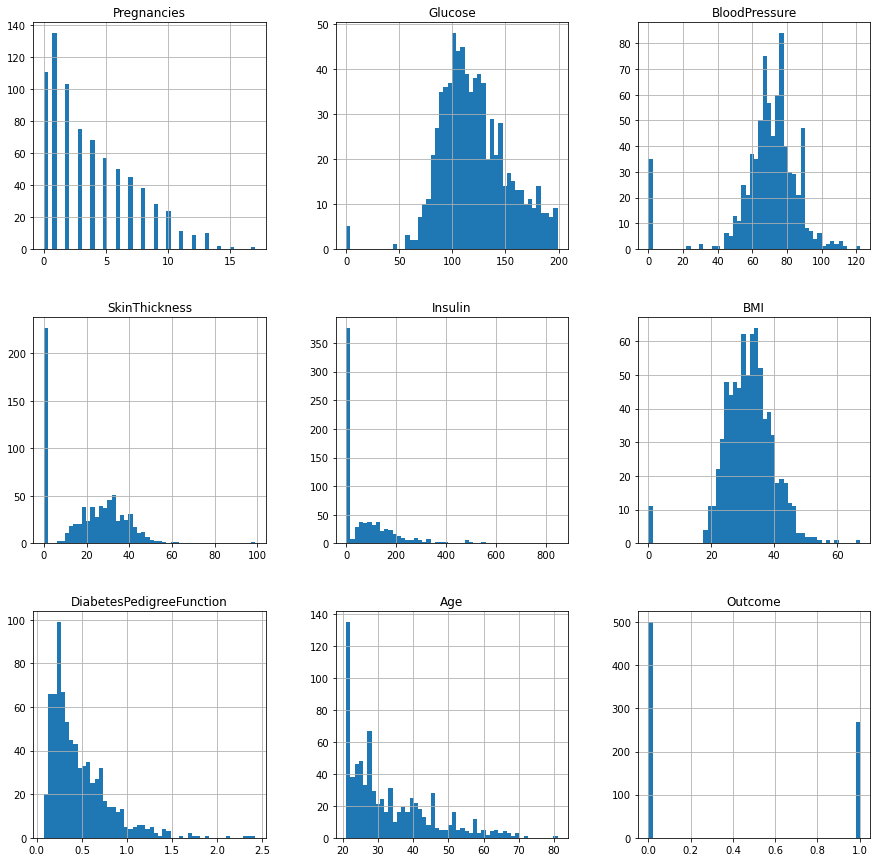

In [5]:
dataset.hist(bins=50, figsize=(15, 15))

As it can be seen above, there are a lot of 0 values in most of the features. We should do something about this, as these rows will affect the result of the model, for example the model can't decide correctly if some person is diabetic or not, if it has been trained with more than 370 samples saying insuling level was zero! (Because insulin levels have direct effect on the diabetes test results).

There are two approaches for this, remove rows containing zero values, or fill the values with mean of the column. The first one is extreme and destructive, as it removes almost 80% of the dataset in case of Insulin/SkinThickness. We use a hybrid approach, remove zero values in columns with low zero frequency(BMI, Glucose, BloodPressure) and fill the zero values in columns with high zero frequency(Insulin, Age).

In [6]:
med_insulin = dataset['Insulin'].median()
med_skin = dataset['SkinThickness'].median()

# filling the Insulin and SkinThickness with their column median value
dataset['Insulin'] = dataset['Insulin'].replace(0, med_insulin)
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, med_skin)

#removing zero values of glucose/BMI/BloodPressure as there is not too many sample of them
dataset = dataset[(dataset['BloodPressure']!=0) & (dataset['BMI']!=0) & (dataset['Glucose']!=0)]

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

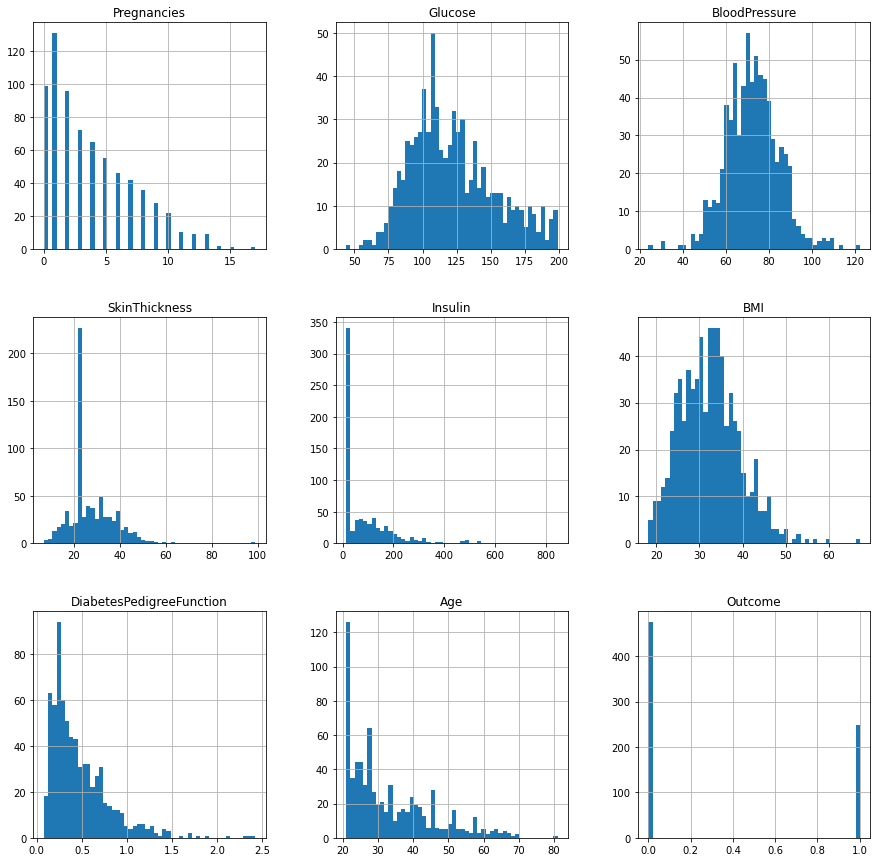

In [7]:
dataset.hist(bins=50, figsize=(15, 15))

It has been asked to 'Make the dataset imbalance with 10% of the True (1) label' so we first counted true/false outcomes and then up-sampled the true samples.

As it can be seen, from the population, there are 268 diabetic and 500 normal. To make the dataset imbalance in a way that the data is imbalanced with 10% of the diabetic people, there are 2 approaches possible. 

1- We can under-sample the diabet-free class, more accurately if we remove samples from those 500 would acquire us the named goal, but this approach would not be best, hence we would lose data. 

2- Second approach is over-sample from the diabetic class where we could add sample randomly(which may cause over-fitting since we are adding exact copies to our dataset) or from the value domains(mean, max/min, ...) of the existing diabetic samples.

**We will use the second approach**

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

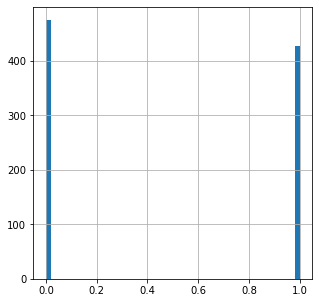

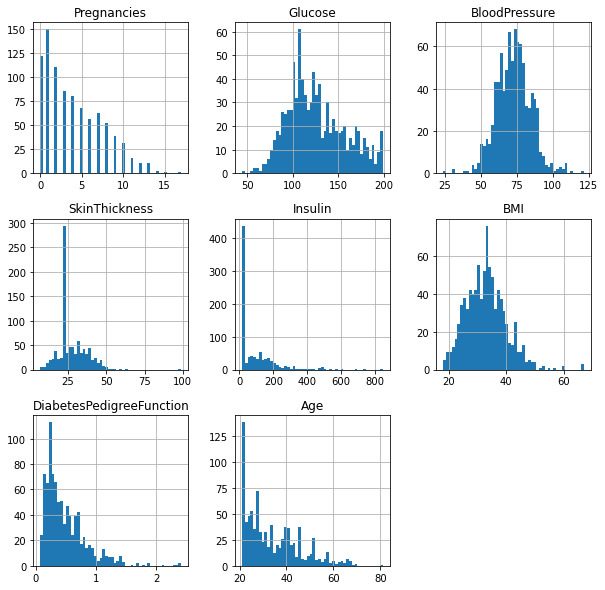

In [67]:
from imblearn.over_sampling import RandomOverSampler


# we want 10% more of the True(1) label
# so first we over-sample the True samples to be as much as False sample (both become equal)
# next we under-sample False samples with a ratio of 0.9 so True samples would be 10% more
ros = RandomOverSampler(sampling_strategy=0.9)

X_over, y_over = ros.fit_resample(X, y)

y_over.hist(bins=50, figsize=(5, 5))
X_over.hist(bins=50, figsize=(10, 10))

Now the data set is imbalanced with 10% of the True label.

The feature engineering & feature selection steps has been asked to be explained and implemented(if there is a need).

Feature engineering method is used when our data represents some faulty values, something doesn't seem quite reasonable or the existing data cannot be used directly and effectively in our model. In that case we use our domain knowledge to edit the data and/or create a new column from that column(s).

About feature selection, it is more often used when there are too many features(and some of them may even be misleading), in that case, using this amount of features and data may even make our model results worse; Hence, there is feature selection. We pick some of the features we deem more valuable and worthwhile to the model, and dispose of the rest.

In the case of Pima Indians Diabetes dataset, the features provide enough and valuable data(since the information was obtained from a credible medical research) and there aren't too many of them. In fact all of the features are related to the matter and removing them would be harmful. So I believe cleaning the data, filling the N/A, Zero values, ... and making the dataset more balanced(with a ratio of 10% towards the false label) would do the job.

### ML Model

There were several approaches in regards to what model should be used; I used the following models to get different results and be able to compare them.

In [70]:
# splitting dataset in training/test sets with a 70:30 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over, y_over, test_size=0.30, random_state=10)

#### Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
naive=GaussianNB()
naive.fit(X_train,y_train)
predicted_naive=naive.predict(X_test)
accuracy_naive=metrics.accuracy_score(y_test,predicted_naive)
print(f'Naive Bayes accuracy is {round(accuracy_naive * 100, 2)}%')

Naive Bayes accuracy is 70.11%


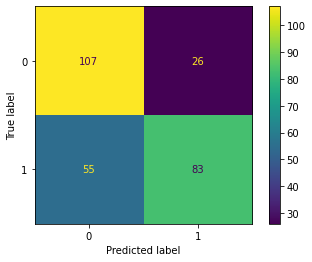

In [84]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(naive, X_test, y_test)  
plt.show() 

#### K-Nearest Neighbors

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
predicted_knn=knn.predict(X_test)
accuracy_knn=metrics.accuracy_score(y_test,predicted_knn)
print(f'KNN accuracy is {round(accuracy_knn * 100, 2)}%')

KNN accuracy is 73.8%


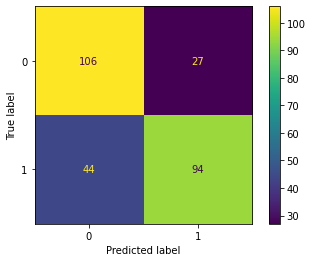

In [86]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show() 

#### Desicion Tree

In [89]:
from sklearn import tree
d_tree=tree.DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
predicted_tree=d_tree.predict(X_test)
accuracy_tree=metrics.accuracy_score(y_test,predicted_tree)
print(f'Decision tree accuracy is {round(accuracy_tree * 100, 2)}%')

Decision tree accuracy is 76.38%


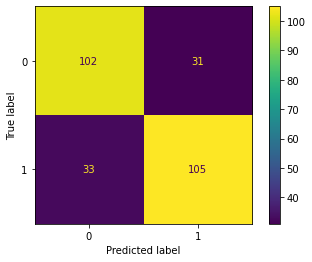

In [90]:
plot_confusion_matrix(d_tree, X_test, y_test)  
plt.show() 

#### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
logisticRegr= LogisticRegression(max_iter=200)
logisticRegr.fit(X_train,y_train)
predict_lg = logisticRegr.predict(X_test)
accuracy_lg=metrics.accuracy_score(y_test,predict_lg)
print(f'Logistic regression accuracy is {round(accuracy_lg * 100, 2)}%')

Logistic regression accuracy is 73.06%


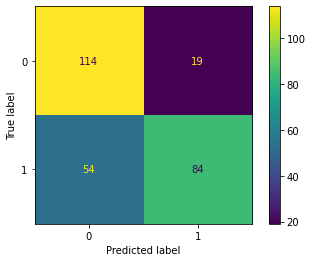

In [99]:
plot_confusion_matrix(logisticRegr, X_test, y_test)  
plt.show() 

#### Linear Discriminant Analysis

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
predict_lda=lda.predict(X_test)
accuracy_lda=metrics.accuracy_score(y_test,predict_lda)
print(f'Linear discriminant analysis accuracy is {round(accuracy_lda * 100, 2)}%')

Linear discriminant analysis accuracy is 71.59%


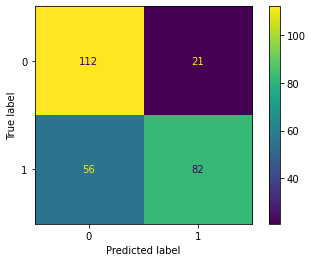

In [101]:
plot_confusion_matrix(lda, X_test, y_test)  
plt.show() 

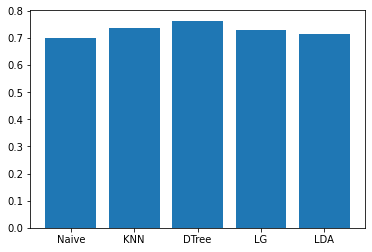

In [105]:
accuracies = [accuracy_naive, accuracy_knn, accuracy_tree, accuracy_lg, accuracy_lda]
x = ['Naive', 'KNN', 'DTree', 'LG', 'LDA']

plt.bar(x, accuracies)
plt.show()

The above visualization shows that all of the models have performed quite equally on the task. With the best of them being D-Tree with 76.38% of accuracy and the least accuracy being Naive Bayes with 70.11% of accuracy.